# Data Science Mathematics
# Social Network Analysis
# In-Class Activity

Refer to the handout for a description of this activity.

You will analyze the two ego graphs provided.  One is a known Russian bot, and the other is unknown.  Based on graph resonance, determine if the unknown graph is likely to be a military person.  You will also calculate the clustering coefficients for each graph, and enumerate the communities.

First, import the relevant libraries.

# Question 1: What metric will allow you to quantify the similarity between graphs?

Resonance will allow quantification of the similarity between graphs.

In [1]:
import networkx as nx
import pickle
import os
import math
import matplotlib.pyplot as plt
import numpy as np

The graph objects have been serialized.  Build a function to load them into memory using pickle.

In [28]:
#open pickle file # this is an attempt to fix reading files
def open_pickle(pickle_path):
    a=open(pickle_path,"rb").readlines() #read pickle file line by line
    a=map(lambda x:x.replace("\r\n","\n"),a) # replace \r\n with \n
    with open(pickle_path,"wb") as j: #write back to file in binary mode
        for i in a:
            j.write(i)         
    with open(pickle_path, 'rb') as pickle_file:
        object_name = pickle.load(pickle_file)
    return object_name

In [29]:
# remade function
def open_pickle1(pickle_path):
    with open(pickle_path, 'rb') as pickle_file:
        object_name = pickle.load(pickle_file)
    return object_name

You will have to calculate the resonance for all vertices in your ego graphs.  Define a function to calculate the betweenness centralities for all vertices.

In [3]:
#Get betweenness centrality
def spectrum(G):
    centrality = nx.betweenness_centrality(G)
    return centrality

Now, define a function for calculating graph resonance.

In [4]:
#Calculate graph resonance between graphs G1 and G2, with resonances S1 and S2, respectively
def resonate(G1, S1, G2, S2):
    res_divisor_1 = sum([a**2 for a in S1.values()])
    res_divisor_2 = sum([a**2 for a in S2.values()])
    res_divisor = math.sqrt(res_divisor_1*res_divisor_2)
    if res_divisor == 0:
        resonance = 0.0
    else:
        G1_nodes = G1.nodes()
        G2_nodes = G2.nodes()
        G_intersect = list(set(G1_nodes) & set(G2_nodes))
        if len(G_intersect) != 0:
            S1_list = [S1[node] for node in G_intersect]
            S1_array = np.array(S1_list)
            S2_list = [S2[node] for node in G_intersect]
            S2_array = np.array(S2_list)
            resonance_raw = np.dot(S1_array, S2_array)
            resonance = resonance_raw/res_divisor
        else:
            resonance = 0.0
    return resonance

It is important to know the clustering coefficients for each graph.  You should define a function for that.

In [5]:
#Calculate clustering coefficient for graph G
def clustering_coeff(G):
    c = nx.average_clustering(G)
    return c

You will also want to enumerate the communities in each graph.  Let's define a function to use the Clauset-Newman-Moore algorithm for community detection.

In [6]:
#Community detection
def get_communities(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    return communities

Now that you've defined all your functions, let's import the graphs.  Specify the absolute paths of your ego graphs.

In [34]:
#Note that you have to specify the absolute paths yourself for the graphs associated with this exercise
#Here is an example:
#r'C:\Directory1\Directory2\File_Name.pkl'

known_bot_path = r'C:\Users\cjcur\OneDrive\Documents\Programming\mathematics\Test\known_bot2_Session7.pkl'
unknown_path_1 = r'C:\Users\cjcur\OneDrive\Documents\Programming\mathematics\Test\Unknown_1_Session7.pkl'

Now let's load each graph.

In [35]:
known_bot = open_pickle1(known_bot_path)
unknown_1 = open_pickle1(unknown_path_1)

Let's explore our graphs a bit.  How many nodes (vertices) are in each one?  What does this mean?

In [36]:
print('Vertices in Known Bot: {}'.format(len(known_bot.nodes())))
print('Vertices in Unknown 1: {}'.format(len(unknown_1.nodes())))

Vertices in Known Bot: 543
Vertices in Unknown 1: 459


Let's also plot slices of each graph.  But first, we need to induce subgraphs from each graph because there are probably too many vertices to make a good plot.

In [37]:
#Get slices (subsets) of each edge set.
known_bot_end = int(0.1*len(known_bot.edges()))
unknown_1_end = int(0.1*len(unknown_1.edges()))
known_bot_edges_slice = list(known_bot.edges())[0:known_bot_end]
unknown_1_edges_slice = list(unknown_1.edges())[0:unknown_1_end]

#Induce subgraphs
KB_sub = known_bot.edge_subgraph(known_bot_edges_slice)
U1_sub = unknown_1.edge_subgraph(unknown_1_edges_slice)

The known bot graph is quite large and will take a while to draw, so we will skip that one for now.

Let's plot the unknown 1 graph.

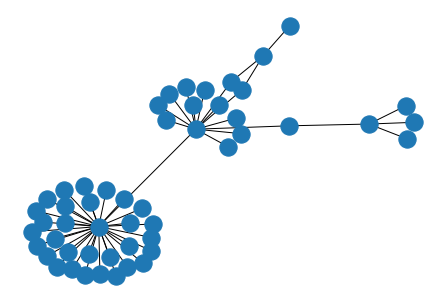

In [39]:
nx.draw(U1_sub)
plt.show()

Now plot the known bot graph in the line below:

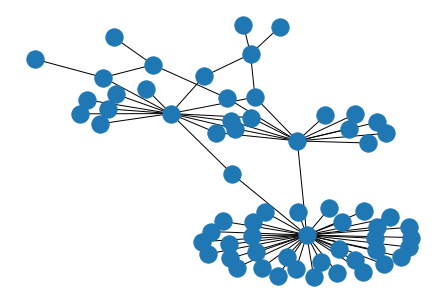

In [40]:
nx.draw(KB_sub)
plt.show()

Now that you've loaded the graphs into memory, you need to calculate the centralities for each vertex in each graph.

In [41]:
known_bot_centralities = spectrum(known_bot)
unknown_1_centralities = spectrum(unknown_1)

Now calculate the clustering coefficients for each graph.

In [42]:
known_bot_cluster = clustering_coeff(known_bot)
unknown_1_cluster = clustering_coeff(unknown_1)

Let's analyze the clustering coefficients.  How similar are they?  What do they tell you about each graph?

In [44]:
print('Known Bot Clustering Coefficient: {}'.format(known_bot_cluster))
print('Unknown 1 Clustering Coefficient: {}'.format(unknown_1_cluster))

Known Bot Clustering Coefficient: 0.20371874907173476
Unknown 1 Clustering Coefficient: 0.07937480027928205


# Known Bot has a higher transitivity compared to Unknown 1, but both are low, meaning that the nodes are less transient and more directed (fewer vertices connected to each other in groups like a clique).

Now we need to calculate the resonance between the graphs.  We have already calculated the betweenness centralites for each, which is required for the resonance calculation.  What does the resonance tell us?

In [45]:
#Resonance between Known Bot and Unknown 1
K_1_res = resonate(known_bot, known_bot_centralities, unknown_1, unknown_1_centralities)

Now let's examine our resonance output.

In [47]:
print('Resonance between Known Bot and Unknown 1: {}'.format(K_1_res))

Resonance between Known Bot and Unknown 1: 0.9128869072090952


Now let's explore the communities in each graph.

In [48]:
Known_Bot_Communities = get_communities(known_bot)
Unknown_1_Communities = get_communities(unknown_1)

Now, let's examine our communities output.

In [49]:
print('Known Bot Communities')
for community in Known_Bot_Communities:
    print(len(community))
print('=====================')

print('Unknown 1 Communities')
for community in Unknown_1_Communities:
    print(len(community))

Known Bot Communities
240
143
75
46
39
Unknown 1 Communities
303
75
43
38


Use your output to answer the questions on the activity handout.

# One of the ego networks is from a known bot, and the other two are unknown.  Based on your analysis, which of the unknown networks is most likely to be a bot?

We only had two networks given, but the high resonance between the botnet indicates that it is likely a bot.

# d.	Ego graphs are constructed from social connections, in this case, Twitter followers.  Do you think your hypothesis is a reasonable one, i.e., is Twitter follower status a sufficient indicator of a true connection?  Why or why not, or does it depend on other factors?  Are there other methods of generating graph edges that might better represent a possible relationship?  Explain your reasoning.

Twitter follower status is not in itself a sufficient indicator of a true connection, especially for a user; however, when determining a bot, especially when they make many accounts for the sake of influencing over a large scale, Twitter followers and the status would be a valuable way to distinguish them from other units. Other ways to generate graph edges would be having multiple factor correlation, such as mapping people who have Twitter and Facebook or similar social media connections. This method would ensure more likely correlation of a possible relationship, but also could have the opposite issue of losing too much data from users who use not observed networks or means of communication (such as by phone, if not seen).

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.